# 逻辑回归

假设函数：$h(x)=\frac{1}{1+e^{-X\theta}}$

参数：$\theta=(\theta_0,...,\theta_n)^{'}$

代价函数：$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\ln(\sigma(X^{i}\theta))+(1-y^{i})\ln(1-\sigma(X^{i}\theta))$

梯度：$\bigtriangledown J(\theta)=\frac{1}{m}X^T(h(x)-y)$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wh_data = pd.read_csv('../AQI_maincity/武汉.csv', index_col='date', encoding='utf-8', engine='python')
wh_data.drop(wh_data[wh_data['质量等级']=='无'].index, inplace=True)
wh_data.drop('质量等级', axis=1, inplace=True)
wh_data.head()

,AQI,PM2.5,PM10,SO2,CO,NO2,O3_8h
date,,,,,,,
2014-01-01,203,153,210,70,2.0,106,55
2014-01-02,231,181,254,89,2.4,112,26
2014-01-03,224,174,226,63,1.7,84,55
2014-01-04,147,112,184,73,1.6,87,40
2014-01-05,195,147,213,89,2.2,91,53


In [3]:
def get_grade(aqi):
    if aqi <=100:
        return '1'
    else:
        return '-1'

In [4]:
wh_data['GRADE'] = wh_data.AQI.apply(get_grade).dropna(axis=0)
wh_data.groupby(by='GRADE').size()

GRADE
-1     689
1     1125
dtype: int64

In [5]:
X = wh_data.iloc[:, 1:3]
y = wh_data.iloc[:, -1]

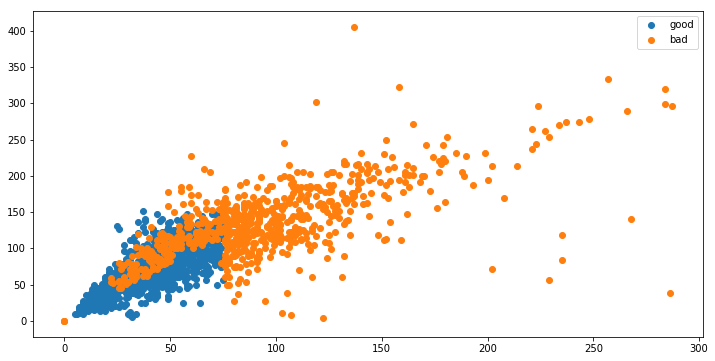

In [6]:
X_good = X[y=='1']
X_bad = X[y=='-1']

plt.figure(figsize=(12,6))
plt.scatter(X_good['PM2.5'], X_good['PM10'], label='good')
plt.scatter(X_bad['PM2.5'], X_bad['PM10'], label='bad')
plt.legend()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
log_reg.score(X_test, y_test)

0.8964757709251101

**决策边界**

$X\theta=0$

In [10]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(axis[1]-axis[0])).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(axis[3]-axis[2])).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\Anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


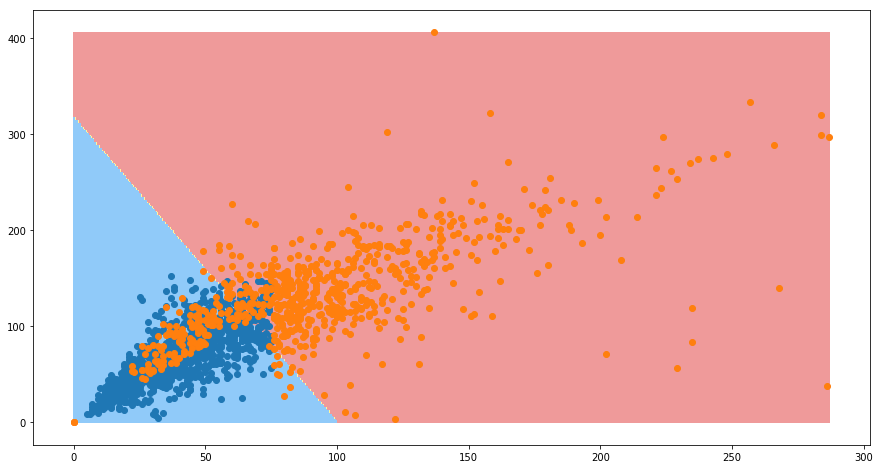

In [11]:
plt.figure(figsize=(15,8))
plot_decision_boundary(log_reg, axis=[0,np.max(X)[0], 0,np.max(X)[1]])
plt.scatter(X_good['PM2.5'], X_good['PM10'])
plt.scatter(X_bad['PM2.5'], X_bad['PM10'])
plt.show()

**加入多项式特征**

In [12]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [13]:
poly_log_reg = PolynomialLogisticRegression(2)
poly_log_reg.fit(X_train, y_train)
poly_log_reg.score(X_test, y_test)

0.9008810572687225

D:\Anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


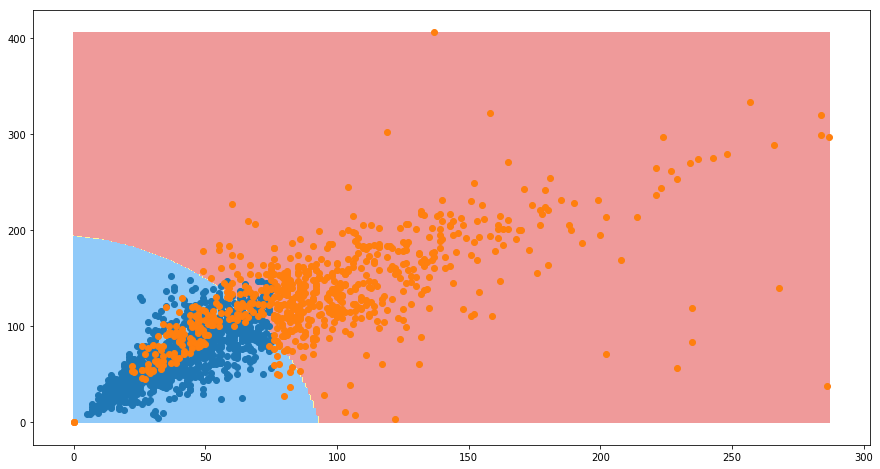

In [14]:
plt.figure(figsize=(15,8))
plot_decision_boundary(poly_log_reg, axis=[0,np.max(X)[0], 0,np.max(X)[1]])
plt.scatter(X_good['PM2.5'], X_good['PM10'])
plt.scatter(X_bad['PM2.5'], X_bad['PM10'])
plt.show()